In [24]:
import pandas as pd
import numpy as np
import os
os.listdir('./data/ml-100k')

['allbut.pl',
 'mku.sh',
 'README',
 'u.data',
 'u.genre',
 'u.info',
 'u.item',
 'u.occupation',
 'u.user',
 'u1.base',
 'u1.test',
 'u2.base',
 'u2.test',
 'u3.base',
 'u3.test',
 'u4.base',
 'u4.test',
 'u5.base',
 'u5.test',
 'ua.base',
 'ua.test',
 'ub.base',
 'ub.test']

# prepare data

In [25]:
path = './data/ml-100k/'

In [28]:
genres_data = pd.read_csv(path + 'u.genre', sep = '|', encoding = "ISO-8859-1", header = None, names=['name', 'id'])
genres_data

,name,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [38]:
movie_data_columns = np.append(['movie_id', 'title', 'release_date', 'video_release_date', 'url'], genres_data['name'].values)

movie_data = pd.read_csv(path + 'u.item', sep = '|', encoding = "ISO-8859-1", header = None, names = movie_data_columns,index_col = 'movie_id')

movie_data.head()

,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
selected_columns = np.append(['title', 'release_date'], genres_data['name'].values)
movie_data = movie_data[selected_columns]
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

movie_data.head()

,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
ratings_data = pd.read_csv(path + 'u.data', sep = '\t', encoding = "ISO-8859-1", header = None, 
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [44]:
movie_data['ratings_average'] = ratings_data.groupby(['movie_id'])['rating'].mean()
movie_data['ratings_count'] = ratings_data.groupby(['movie_id'])['rating'].count()
movie_data[['title', 'ratings_average','ratings_count']].head()

,title,ratings_average,ratings_count
movie_id,,,
1,Toy Story (1995),3.878319,452
2,GoldenEye (1995),3.206107,131
3,Four Rooms (1995),3.033333,90
4,Get Shorty (1995),3.550239,209
5,Copycat (1995),3.302326,86


# preprocessing data

## remove NAs
- only release_date

In [47]:
movie_data[selected_columns].isnull().sum()

title           0
release_date    1
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

array([267], dtype=int64)

In [49]:
movie_data.release_date.describe()

count                    1681
unique                    240
top       1995-01-01 00:00:00
freq                      215
first     1922-01-01 00:00:00
last      1998-10-23 00:00:00
Name: release_date, dtype: object

In [57]:
#drop na row
movie_data = movie_data.drop(movie_data[movie_data.release_date.isna()].index.values)
movie_data.shape

(1681, 23)

In [59]:
movie_data.dtypes

title                      object
release_date       datetime64[ns]
unknown                     int64
Action                      int64
Adventure                   int64
Animation                   int64
Children's                  int64
Comedy                      int64
Crime                       int64
Documentary                 int64
Drama                       int64
Fantasy                     int64
Film-Noir                   int64
Horror                      int64
Musical                     int64
Mystery                     int64
Romance                     int64
Sci-Fi                      int64
Thriller                    int64
War                         int64
Western                     int64
ratings_average           float64
ratings_count               int64
dtype: object

## duplicate data drop

In [73]:
movie_data[movie_data.title == 'Butcher Boy, The (1998)']

,title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ratings_average,ratings_count
movie_id,,,,,,,,,,,,,,,,,,,,,
1645,"Butcher Boy, The (1998)",1998-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1
1650,"Butcher Boy, The (1998)",1998-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1


In [75]:
movie_data = movie_data.drop(1650)
movie_data.shape

(1680, 23)

## compute the artificial attributes('price' and 'buy_probability')

In [76]:
from datetime import datetime
import dateutil

In [82]:
oldest_date = movie_data['release_date'].min()
newest_date = movie_data['release_date'].max()

normalized_age = (newest_date - movie_data['release_date']) / (newest_date - oldest_date)
normalized_rating = (5 - movie_data.ratings_average) / (5-1)

movie_data['price'] = np.round((1-normalized_rating) * (1-normalized_age) * 10)
movie_data['price'] = movie_data['price'].apply(int)
movie_data[['title','price','ratings_average','ratings_count']].head()

,title,price,ratings_average,ratings_count
movie_id,,,,
1,Toy Story (1995),7,3.878319,452
2,GoldenEye (1995),5,3.206107,131
3,Four Rooms (1995),5,3.033333,90
4,Get Shorty (1995),6,3.550239,209
5,Copycat (1995),5,3.302326,86


In [84]:
#the lower the price, the more likely i am going to buy
movie_data['buy_proba'] = 1 - movie_data['price'] * 0.1

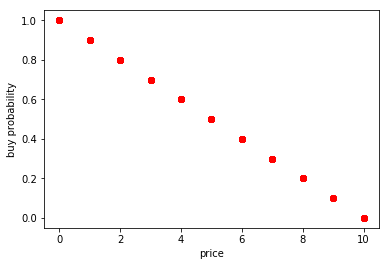

In [86]:
import matplotlib.pyplot as plt

plt.plot(movie_data.price.values, movie_data.buy_proba.values, 'ro')
plt.xlabel('price'); plt.ylabel('buy probability')
plt.show()

# plot distribution

In [135]:
def plot_ratings(movie_data) :
    movie_data['ratings_average'].hist()
    plt.title('Ratings distribution')
    
def plot_price(movie_data) :
    movie_data['price'].hist()
    plt.title('Price distribution')
    
def plot_ratings_count(movie_data) :
    movie_data['ratings_count'].hist()
    plt.title('Raings count')
    
def buy_proba_dist(movie_data) :
    movie_data['buy_proba'].hist(bins = 11)
    plt.title("Buy probability distribution")
    
def plot_years(movie_data) :
    years = movie_data['release_date'].values.astype('datetime64[Y]').astype(int) + 1970 #월은 상관없이 연도로 정리함
    plt.hist(years)
    plt.title("Years distribution")
    
def plot_genres(movie_data) :
    #gerne별 카운트 합
    genres_array = [(genre, movie_data[genre].sum())for genre in genres_data.name]
    genres_names = list(map(lambda x : x[0], genres_array)) #genre only
    genres_count = list(map(lambda x : x[1], genres_array)) #gcount_only

    genres_df = pd.DataFrame({'name' : genres_names, 'count' : genres_count})
    
    x = np.arange(len(genres_df))
    plt.bar(x, genres_df['count'].values)
    plt.xticks(x, genres_df.name.values, rotation = 'vertical')
    plt.title('Genres distribution')

In [136]:
def plot_distributions(movie_data):
    fig = plt.figure(figsize=(8, 6)) 

    fig.add_subplot(3, 2, 1)
    plot_genres(movie_data)

    fig.add_subplot(3, 2, 2)
    plot_years(movie_data)

    fig.add_subplot(3, 2, 3)
    plot_ratings(movie_data)

    fig.add_subplot(3, 2, 4)
    plot_price(movie_data)

    fig.add_subplot(3, 2, 5)
    plot_ratings_count(movie_data)

    fig.add_subplot(3, 2, 6)
    buy_proba_dist(movie_data)

    plt.tight_layout()

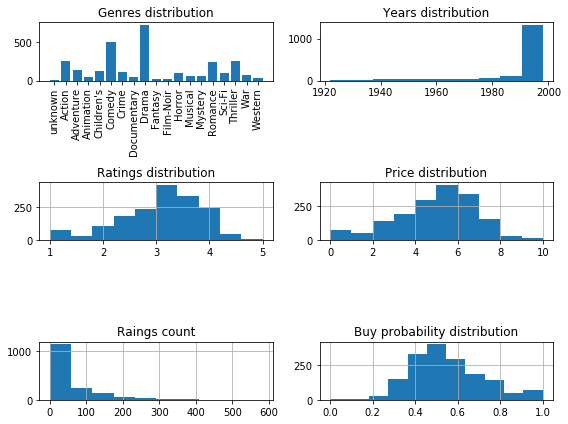

In [137]:
plot_distributions(movie_data)

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']